In [118]:
import pandas as pd
import matplotlib.pyplot as plt


In [119]:
hospitlization2_df = pd.read_csv("hospitalization2_Team_10.csv")
hospitlization2_df.head()

,unitName1,Admission_Entry_Date,Release_Date,unitName2,Admission_Entry_Date2,Release_Date2,Entry_Type,Patient_Origin,Release_Type,Releasing_Doctor,Admission_Days2,Diagnosis_In_Reception,Diagnosis_In_Release,ct,Admission_Days,Period_Between_Admissions
0,5,2021-02-16 17:33:45.570,2021-02-19 12:40:00,5,2021-02-24 15:03:30.490,2021-02-25 12:38:00,urgent,home,home,11023,1,"5370 , 7872 , 78720","5370 , 7872 , 78720",0,3,short
1,4,2022-08-07 13:27:58.780,2022-08-08 15:15:00,4,2022-09-01 04:20:51.617,2022-09-02 16:00:00,urgent,home,home,12517,1,78060,78060,0,1,long
2,5,2023-10-27 07:34:41.013,2023-10-29 17:18:00,5,2023-10-30 17:58:09.730,2023-11-01 15:33:00,urgent,home,home,11887,2,5119,"5119 , 514",0,2,short
3,3,2020-07-29 17:00:56.863,2020-08-03 14:26:00,3,2020-08-30 04:25:30.670,2020-09-03 13:45:00,urgent,home,home,10525,4,"2859 , 7807","486 , 5990",0,5,long
4,1,2021-07-03 11:42:24.973,2021-07-05 17:34:00,1,2021-07-13 01:21:32.077,2021-07-15 11:48:00,urgent,home,home,6890,2,7865,7865,1,2,mid


In [120]:
hospitlization2_df.dtypes


unitName1                     int64
Admission_Entry_Date         object
Release_Date                 object
unitName2                     int64
Admission_Entry_Date2        object
Release_Date2                object
Entry_Type                   object
Patient_Origin               object
Release_Type                 object
Releasing_Doctor              int64
Admission_Days2               int64
Diagnosis_In_Reception       object
Diagnosis_In_Release         object
ct                            int64
Admission_Days                int64
Period_Between_Admissions    object
dtype: object

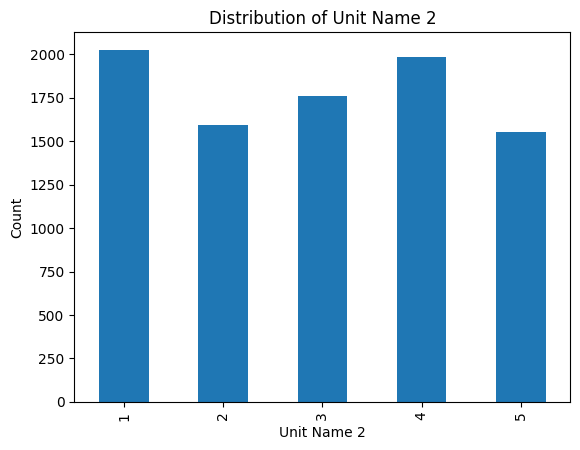

In [121]:

# Count occurrences of each unit
unit_counts = hospitlization2_df['unitName2'].value_counts().sort_index()

# Plot the bar chart
ax = unit_counts.plot(kind='bar')

# Set the labels and title
ax.set_xlabel('Unit Name 2')
ax.set_ylabel('Count')
ax.set_title('Distribution of Unit Name 2')

# Show the plot
plt.show()


It is evident that  hospital unit 1 experienced a higher number of rehospitalizations compared to the other units. Following this unit, units 4 and 3 show the next highest counts of rehospitalizations.

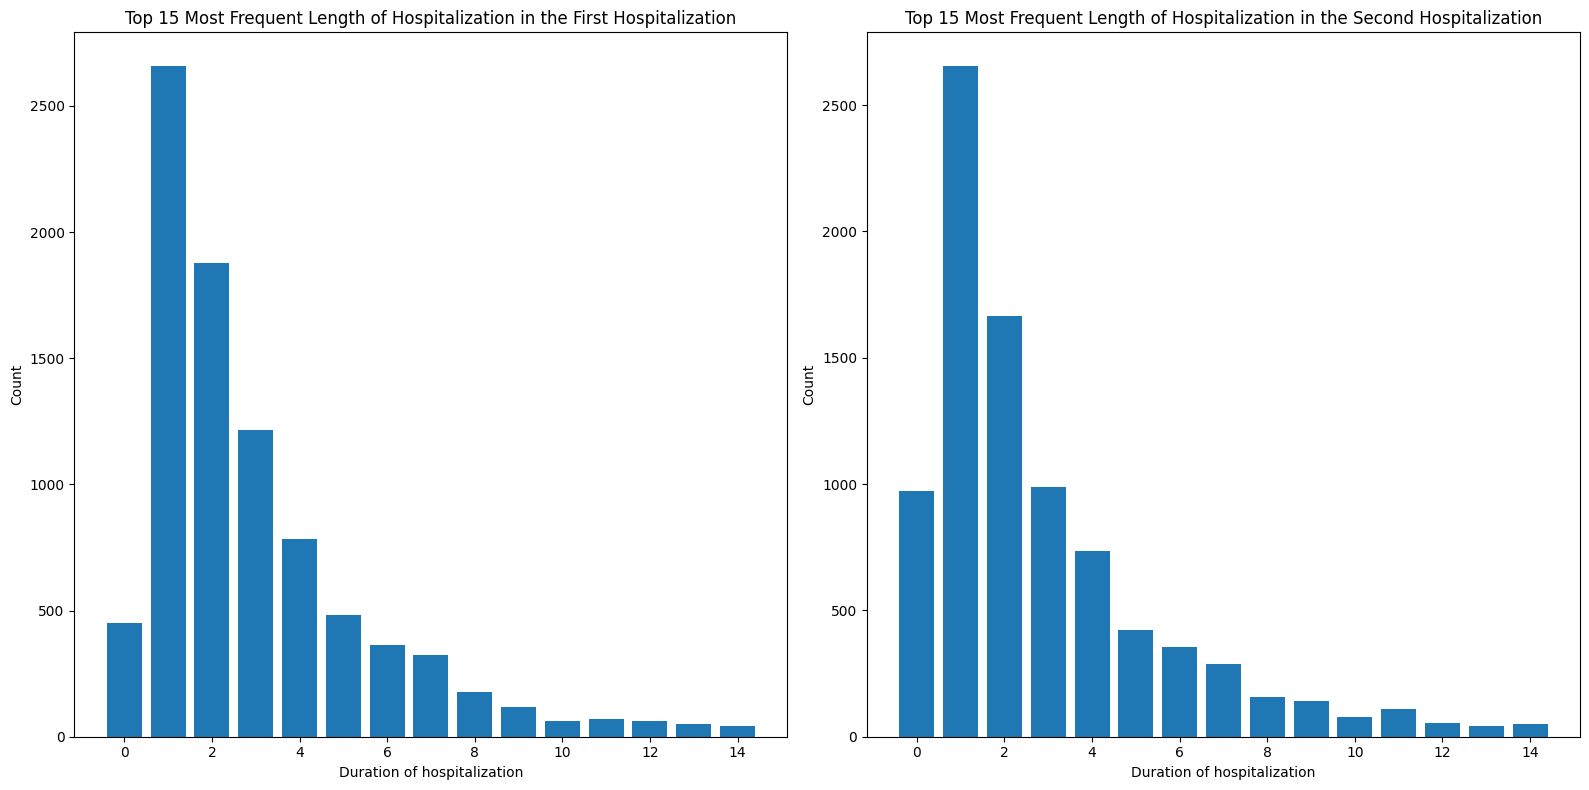

In [131]:
# Prepare data
admission_days_1 = hospitlization2_df['Admission_Days'].value_counts().sort_index().head(15)
admission_days_2 = hospitlization2_df[hospitlization2_df['Admission_Days2'] >= 0]['Admission_Days2'].value_counts().sort_index().head(15)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Plot the first bar chart
ax[0].bar(admission_days_1.index, admission_days_1.values)
ax[0].set_xlabel('Duration of hospitalization')
ax[0].set_ylabel('Count')
ax[0].set_title('Top 15 Most Frequent Length of Hospitalization in the First Hospitalization')

# Plot the second bar chart
ax[1].bar(admission_days_2.index, admission_days_2.values)
ax[1].set_xlabel('Duration of hospitalization')
ax[1].set_ylabel('Count')
ax[1].set_title('Top 15 Most Frequent Length of Hospitalization in the Second Hospitalization')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In these two graphs we can see the duration of the hospitalizaion in each time. We can see that the duration of the second hospitalization generaly is shorter than the first hospitalization.

In [123]:
hospitlization2_df['Admission_Entry_Date'] = pd.to_datetime(hospitlization2_df['Admission_Entry_Date'])
hospitlization2_df['Release_Date'] = pd.to_datetime(hospitlization2_df['Release_Date'])
hospitlization2_df['Admission_Entry_Date2'] = pd.to_datetime(hospitlization2_df['Admission_Entry_Date'])
hospitlization2_df['Release_Date2'] = pd.to_datetime(hospitlization2_df['Release_Date'])




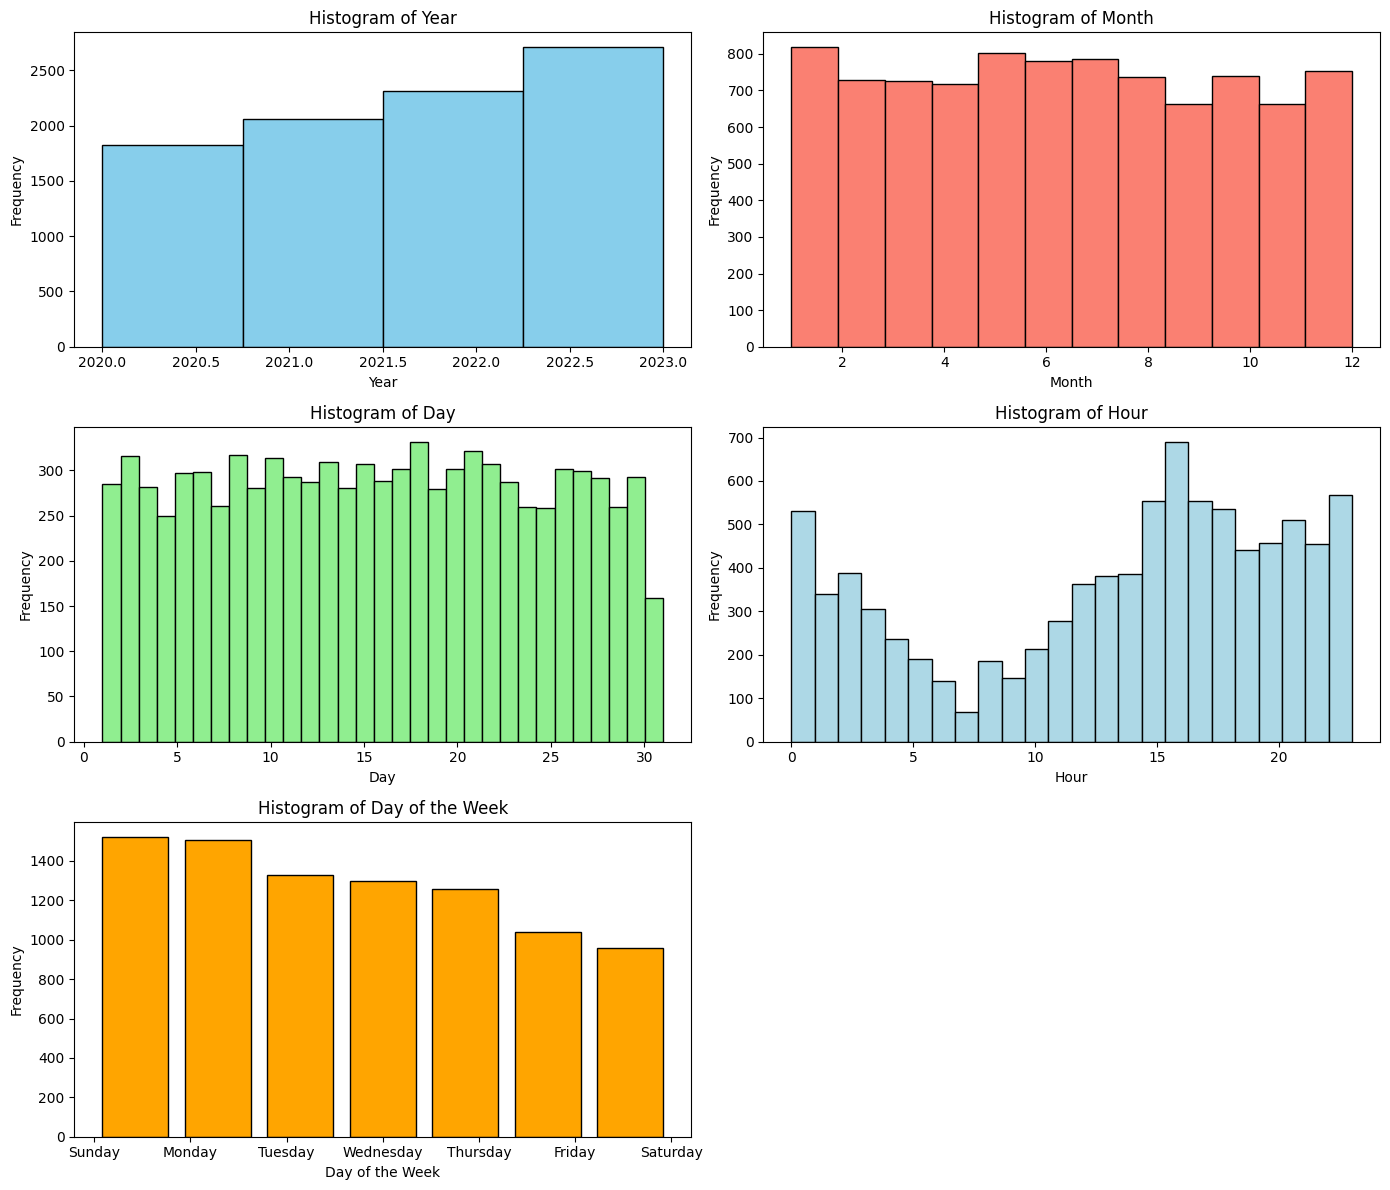

In [124]:

# Extract components from the datetime column
hospitlization2_df['Year'] = hospitlization2_df['Admission_Entry_Date'].dt.year
hospitlization2_df['Month'] = hospitlization2_df['Admission_Entry_Date'].dt.month
hospitlization2_df['Day'] = hospitlization2_df['Admission_Entry_Date'].dt.day
hospitlization2_df['Hour'] = hospitlization2_df['Admission_Entry_Date'].dt.hour
hospitlization2_df['DayOfWeek'] = hospitlization2_df['Admission_Entry_Date'].dt.day_name()  # Get day of the week name

# Set DayOfWeek as a categorical variable with ordered days
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
hospitlization2_df['DayOfWeek'] = pd.Categorical(hospitlization2_df['DayOfWeek'], categories=days_order, ordered=True)

# Sort the dataframe by DayOfWeek categorical order (optional, not needed for hist)
hospitlization2_df.sort_values('DayOfWeek', inplace=True)


# Create subplots to plot the histograms
fig, ax = plt.subplots(3, 2, figsize=(14, 12))  # Adjusted for 5 subplots

# Histogram for Year
# ax[0, 0].hist(df_with_time['Year'], bins=len(df_with_time['Year'].unique()), color='skyblue', edgecolor='black')
ax[0, 0].hist(hospitlization2_df['Year'], bins=4, color='skyblue', edgecolor='black')
ax[0, 0].set_title('Histogram of Year')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('Frequency')

# Histogram for Month
ax[0, 1].hist(hospitlization2_df['Month'], bins=12, color='salmon', edgecolor='black')
ax[0, 1].set_title('Histogram of Month')
ax[0, 1].set_xlabel('Month')
ax[0, 1].set_ylabel('Frequency')

# Histogram for Day
ax[1, 0].hist(hospitlization2_df['Day'], bins=31, color='lightgreen', edgecolor='black')
ax[1, 0].set_title('Histogram of Day')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Frequency')

# Histogram for Hour
ax[1, 1].hist(hospitlization2_df['Hour'], bins=24, color='lightblue', edgecolor='black')
ax[1, 1].set_title('Histogram of Hour')
ax[1, 1].set_xlabel('Hour')
ax[1, 1].set_ylabel('Frequency')

# Histogram for Day of the Week (in order)
ax[2, 0].hist(hospitlization2_df['DayOfWeek'], bins=7, color='orange', edgecolor='black', rwidth=0.8)
ax[2, 0].set_title('Histogram of Day of the Week')
ax[2, 0].set_xlabel('Day of the Week')
ax[2, 0].set_ylabel('Frequency')

# Hide the empty subplot (2, 1)
ax[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


The graphs reveal that rehospitalizations are fairly evenly distributed across each month and day of the month. However, there is a noticeable increase in rehospitalizations over the years. Additionally, rehospitalizations tend to decrease as the week progresses, with the majority occurring at the beginning of the week, particularly after 15:00 and extending into the evening.



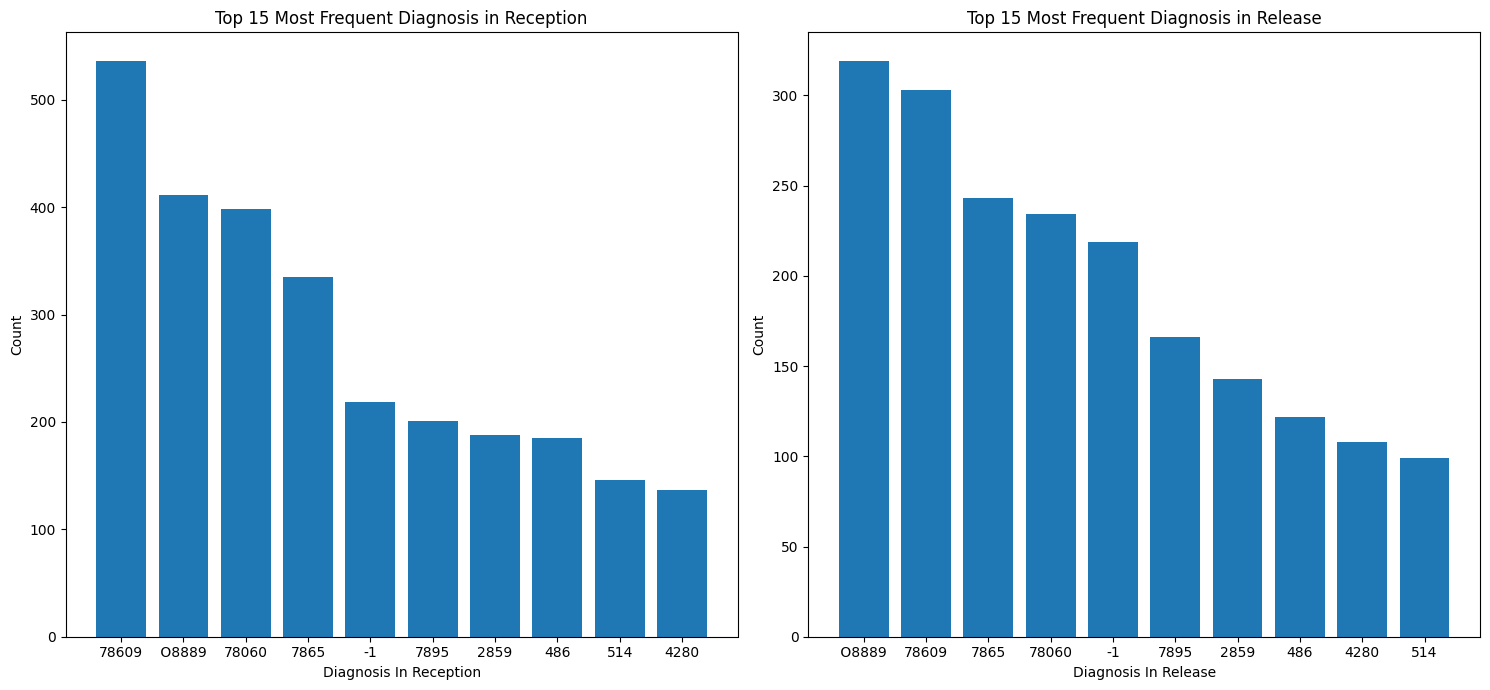

In [129]:
# Prepare data
diagnosis_reception = hospitlization2_df['Diagnosis_In_Reception'].value_counts().head(10)
diagnosis_release = hospitlization2_df['Diagnosis_In_Release'].value_counts().head(10)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 7))  # 1 row, 2 columns

# Plot the bar chart for Diagnosis In Reception
ax[0].bar(diagnosis_reception.index.astype(str), diagnosis_reception.values)
ax[0].set_xlabel('Diagnosis In Reception')
ax[0].set_ylabel('Count')
ax[0].set_title('Top 15 Most Frequent Diagnosis in Reception')

# Plot the bar chart for Diagnosis In Release
ax[1].bar(diagnosis_release.index.astype(str), diagnosis_release.values)
ax[1].set_xlabel('Diagnosis In Release')
ax[1].set_ylabel('Count')
ax[1].set_title('Top 15 Most Frequent Diagnosis in Release')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In the data collected, the three most frequent diagnoses upon reception were: 78609 (Other Dyspnea and Respiratory Abnormality), O8889 (Diagnosis with No Code), and 78060 (Fever). Upon release, the top three diagnoses were: O8889 (Diagnosis with No Code), 78609 (Dyspnea), and 7865 (Non-Cardiac Chest Pain).

These findings indicate that the most common diagnoses were related to shortness of breath (Dyspnea), fever, and chest pain. Notably, the data spans a period largely influenced by the COVID-19 pandemic, which began in 2019 and continued until the end of 2022. This context may explain the high occurrence of diagnoses related to Dyspnea and Fever, as these symptoms are commonly associated with COVID-19.